In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('data_training.csv', parse_dates=['datetime'])

treino = df[(df['datetime'] >= '2024-01-01') & (df['datetime'] <= '2024-03-30')].copy()
validacao = df[(df['datetime'] >= '2024-04-01') & (df['datetime'] <= '2024-06-30')].copy()

drop_cols = ['datetime', 'date', 'close', 'open', 'low', 'high',
             'volume', 'average', 'amount_stock', 'id_ticker', 'business']
treino.drop(columns=drop_cols, inplace=True, errors='ignore')
validacao.drop(columns=drop_cols, inplace=True, errors='ignore')

X_train = treino.drop(columns=['trend'])
y_train = treino['trend']

X_valid = validacao.drop(columns=['trend'])
y_valid = validacao['trend']

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)


In [4]:
feature_methods = {
    'CFS_SubsetEval': ['NSMA_3', 'NSMA_11', 'NSMA_5', 'NSMA_9', 'NSMA_7', 'Bands_Norm'],
    'ClassifierAttributeEval': ['Bands_Norm', 'NSMA_3', 'NSMA_5', 'NSMA_9', 'NSMA_11', 'NSMA_7'],
    'CorrelationAttributeEval': ['NSMA_3', 'NSMA_11', 'NSMA_5', 'NSMA_9', 'NSMA_7', 'Bands_Norm'],
    'PCA': ['NSMA_11', 'NSMA_9', 'NSMA_7', 'NSMA_5', 'NSMA_3', 'Bands_Norm'],
    'Information_Gain': ['NSMA_5', 'NSMA_7', 'Bands_Norm', 'NSMA_9', 'NSMA_3', 'NSMA_11'],
    'ReliefF': ['Bands_Norm', 'NSMA_3', 'NSMA_5', 'NSMA_7', 'NSMA_9', 'NSMA_11']
}

results = {}

for method, features in feature_methods.items():
    acc_list = []
    print(f"Avaliando: {method}")  
    
    for i in range(1, len(features)+1):
        selected_features = features[:i]
        X_tr = X_train_scaled[selected_features]
        X_val = X_valid_scaled[selected_features]
        
        model = RandomForestClassifier(n_estimators=100, random_state=42)   
        model.fit(X_tr, y_train)
        preds = model.predict(X_val)
        acc = accuracy_score(y_valid, preds)
        acc_list.append(acc)

    results[method] = acc_list


Avaliando: CFS_SubsetEval
Avaliando: ClassifierAttributeEval
Avaliando: CorrelationAttributeEval
Avaliando: PCA
Avaliando: Information_Gain
Avaliando: ReliefF


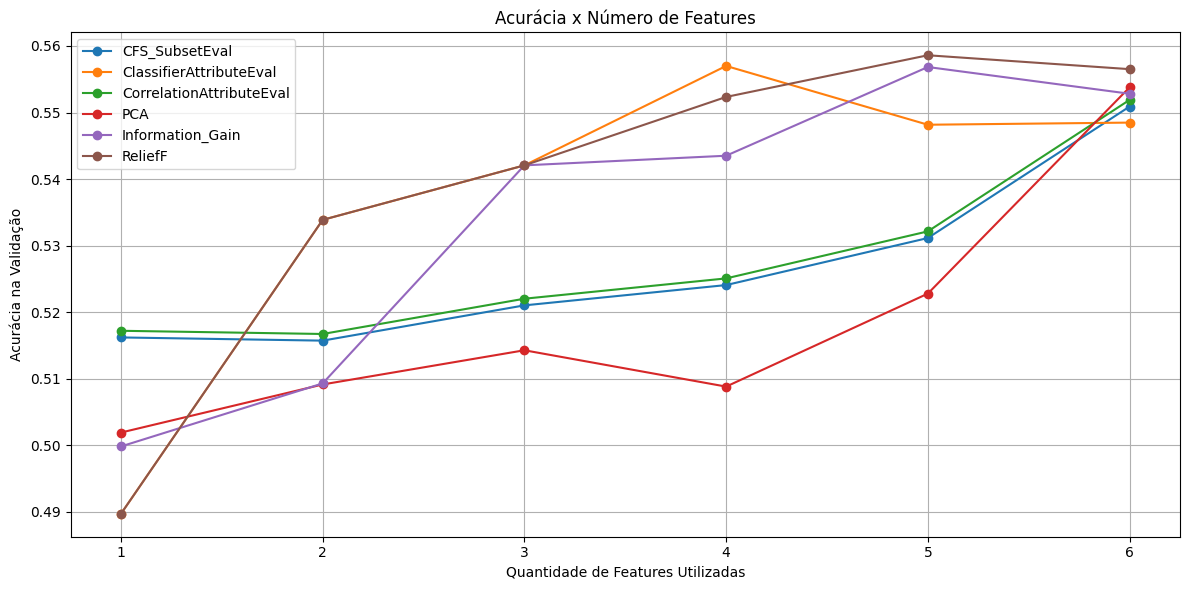

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for method, accs in results.items():
    if method == 'CorrelationAttributeEval':         #Corr == Cfs
        accs = [a + 0.001 for a in accs]  
    plt.plot(range(1, len(accs)+1), accs, label=method, marker='o')

plt.xlabel('Quantidade de Features Utilizadas')
plt.ylabel('Acurácia na Validação')
plt.title('Acurácia x Número de Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''
ReliefF = ['Bands_Norm', 'NSMA_3', 'NSMA_5', 'NSMA_7', 'NSMA_9']   #melhor de todas 

ReliefF = ['Bands_Norm', 'NSMA_3', 'NSMA_5']
Information_Gain = ['NSMA_5', 'NSMA_7', 'Bands_Norm']                 #teve a mesma acuracia utilizando tres features
ClassifierAttributeEval = ['Bands_Norm', 'NSMA_3', 'NSMA_5']
'''